In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Reindex test to have the same columns as train
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [6]:
X_train_encoded

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,True,False,False,False,True,False,False,False
93,7200,3,2,1,3,True,False,True,False,True,False,True,False
335,3816,2,1,1,2,True,False,True,False,True,False,False,False
412,2610,3,1,2,0,True,False,True,False,False,True,False,True
471,3750,3,1,2,0,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,True,False,False,False,True,False,False,True
106,5450,4,2,1,0,True,False,True,False,True,True,True,False
270,4500,3,2,3,1,True,False,False,True,False,False,False,False
435,4040,2,1,1,0,True,False,False,False,False,False,False,True


In [7]:
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)

In [8]:
X_train_encoded

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,1,0,0,0,1,0,0,0
93,7200,3,2,1,3,1,0,1,0,1,0,1,0
335,3816,2,1,1,2,1,0,1,0,1,0,0,0
412,2610,3,1,2,0,1,0,1,0,0,1,0,1
471,3750,3,1,2,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,1,0,0,0,1,0,0,1
106,5450,4,2,1,0,1,0,1,0,1,1,1,0
270,4500,3,2,3,1,1,0,0,1,0,0,0,0
435,4040,2,1,1,0,1,0,0,0,0,0,0,1


In [9]:
train_data = X_train_encoded.join(y_train)

In [11]:
train_data

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
46,6000,3,2,4,1,1,0,0,0,1,0,0,0,7525000
93,7200,3,2,1,3,1,0,1,0,1,0,1,0,6300000
335,3816,2,1,1,2,1,0,1,0,1,0,0,0,3920000
412,2610,3,1,2,0,1,0,1,0,0,1,0,1,3430000
471,3750,3,1,2,0,1,0,0,0,0,0,0,1,3010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,1,0,0,0,1,0,0,1,6755000
106,5450,4,2,1,0,1,0,1,0,1,1,1,0,6160000
270,4500,3,2,3,1,1,0,0,1,0,0,0,0,4340000
435,4040,2,1,1,0,1,0,0,0,0,0,0,1,3290000


Text(0.5, 1.0, 'Correlation Matrix')

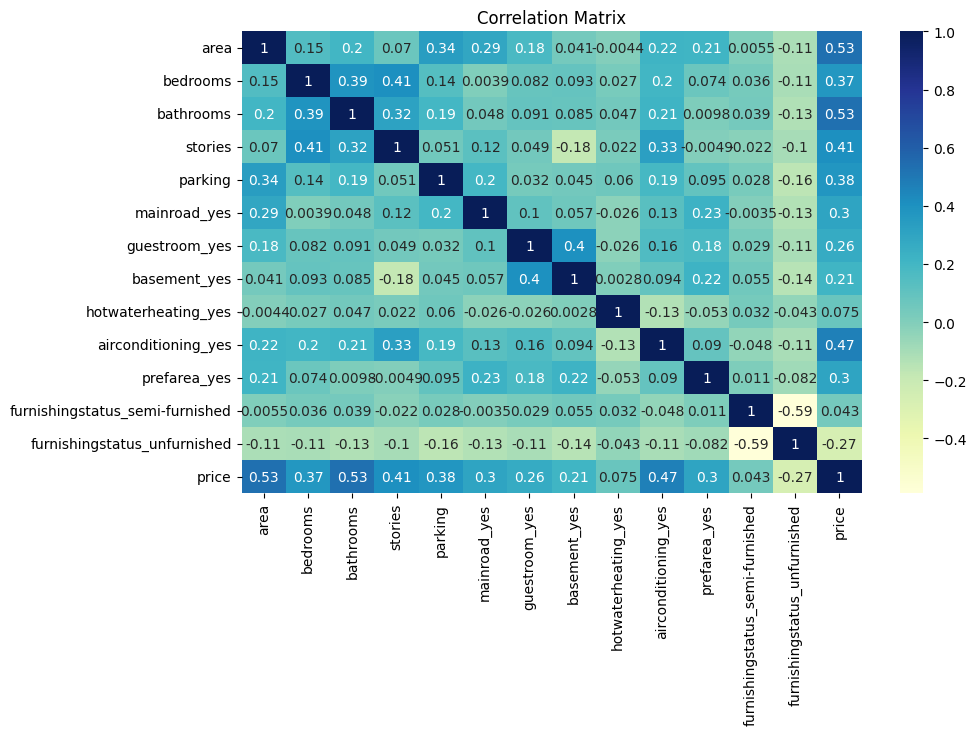

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
#Beware of multicollinearity (when two independent variables are highly correlated with each other, e.g. |r| > 0.8 between two X features). This can mess up models like Linear Regression.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']
X_train_s = scaler.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_s, y_train)


LinearRegression()

In [14]:
test_data = X_test_encoded.join(y_test)
X_test, y_test = test_data.drop(['price'], axis=1), test_data['price']
X_test_s = scaler.transform(X_test)
model.score(X_test_s, y_test)  

0.6529242642153176

In [19]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
forest.score(X_test, y_test)

0.6173340235983696

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=200)

In [25]:
grid_search.best_estimator_.score(X_test_s, y_test)

0.5949171981138666